In [1]:
SELECT * FROM 'Cardiovascular dataset.csv';

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import os

df = pd.read_csv("Cardiovascular dataset.csv",sep=",")

In [40]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [4]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817714,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011381,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# Checking the count of unique values for each column

df.nunique()

id             70000
age             8076
gender             2
height           109
weight           155
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [5]:
# Checking the count of missing values in the columns

df.isna().count()

id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [6]:
# Data Cleaning/Manipulation

# Dropping the id column from the dataset
df.drop(columns=['id'], inplace=True)
df.head()

# Converting the age from days to years
df['age'] = (df['age']/365).astype('int')

# Removing outliers for ap_hi and ap_lo
df = df[(df['ap_lo'] < df['ap_hi'])]
df = df[(df['ap_hi'] >= 60) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 20) & (df['ap_lo'] <= 190)]

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0


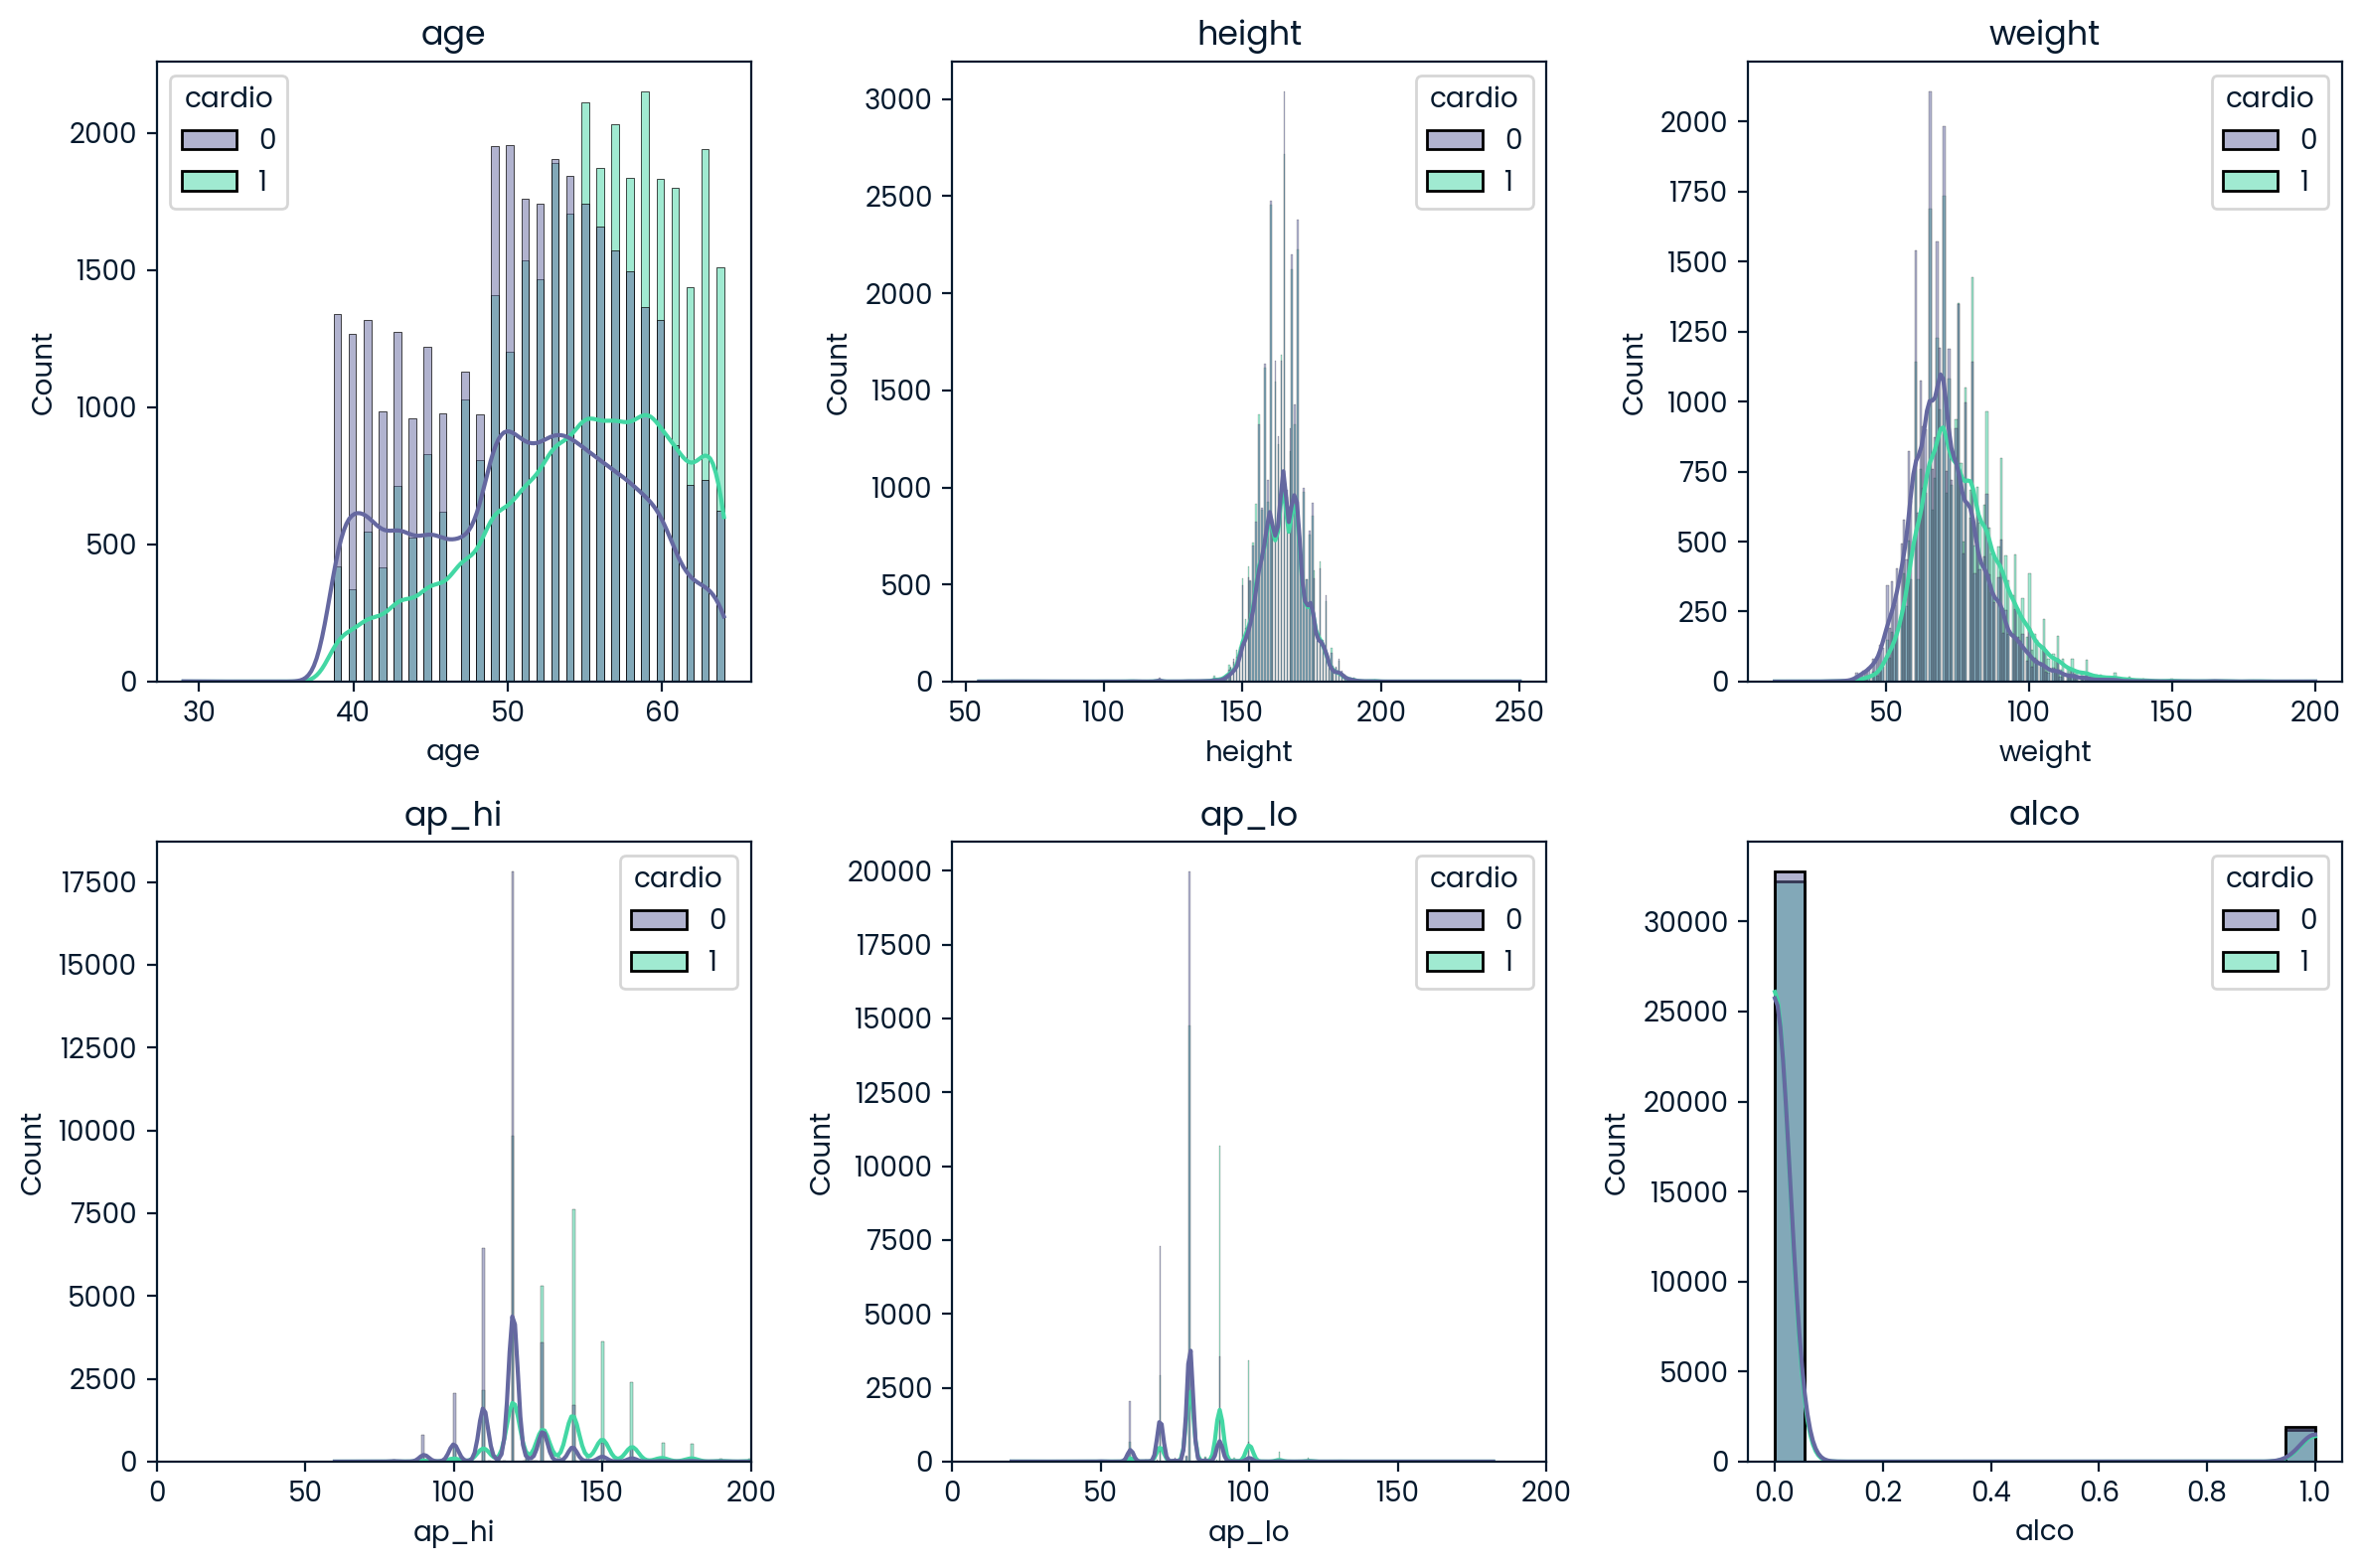

In [7]:

# Select numerical columns from the dataset
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'alco']

# Plot histograms for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=column, hue='cardio', kde=True)
    plt.title(column)
    
        # Set x-axis range for 'ap_hi' and 'ap_lo'
    if column in ['ap_hi', 'ap_lo']:
        plt.xlim(0, 200)  # Adjust the range as needed

plt.tight_layout()
plt.show()


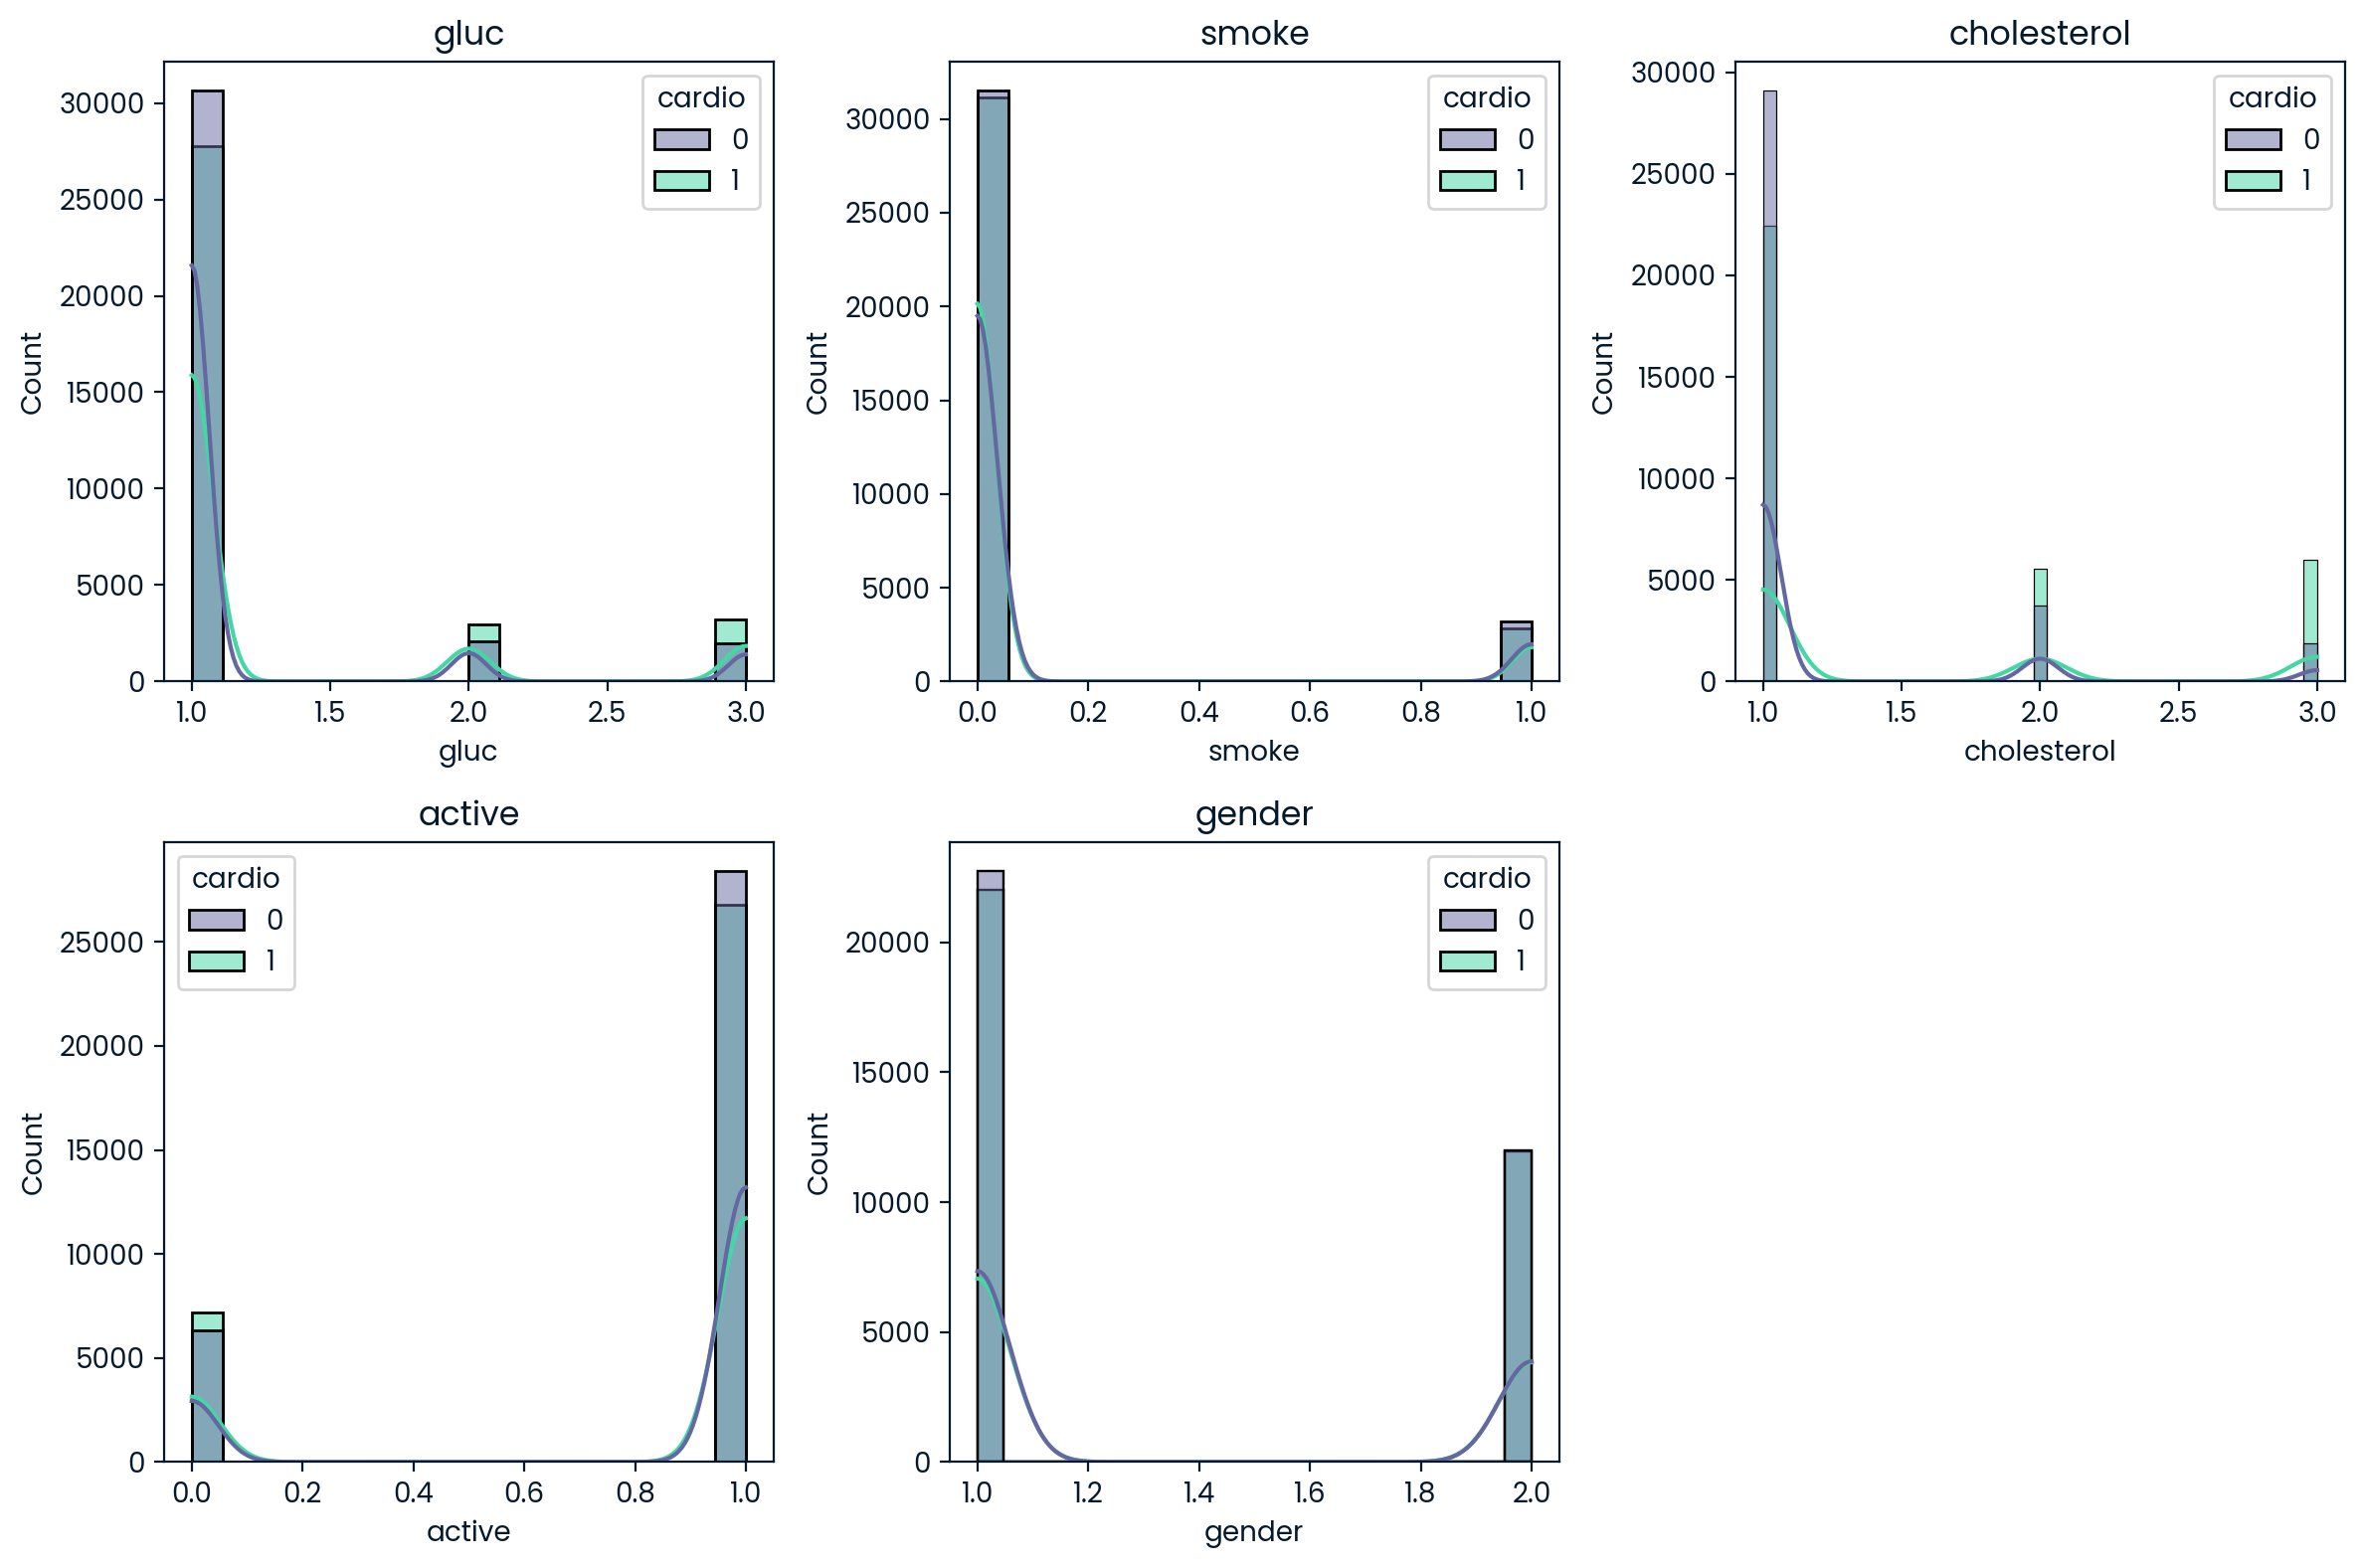

In [8]:

# Select numerical columns from the dataset
numerical_columns = ['gluc', 'smoke', 'cholesterol', 'active', 'gender']

# Plot histograms for each numerical variable grouped by cardio
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=column, hue='cardio', kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [10]:
df_corr = df.corr(numeric_only=True)
df_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023343,-0.081425,0.054613,0.209030,0.155728,0.154934,0.098488,-0.047684,-0.028883,-0.010301,0.239130
gender,-0.023343,1.000000,0.499037,0.155965,0.062221,0.067126,-0.036875,-0.021262,0.338801,0.171245,0.005913,0.007161
height,-0.081425,0.499037,1.000000,0.291618,0.018599,0.035308,-0.050678,-0.018717,0.188239,0.094597,-0.007465,-0.010684
weight,0.054613,0.155965,0.291618,1.000000,0.271059,0.252302,0.141178,0.107047,0.067047,0.067441,-0.017751,0.179728
ap_hi,0.209030,0.062221,0.018599,0.271059,1.000000,0.730964,0.195295,0.094278,0.027741,0.035523,-0.001129,0.427999
ap_lo,0.155728,0.067126,0.035308,0.252302,0.730964,1.000000,0.161143,0.074773,0.025581,0.037504,-0.000603,0.338009
cholesterol,0.154934,-0.036875,-0.050678,0.141178,0.195295,0.161143,1.000000,0.450634,0.009803,0.035036,0.008559,0.221350
gluc,0.098488,-0.021262,-0.018717,0.107047,0.094278,0.074773,0.450634,1.000000,-0.005881,0.010324,-0.007923,0.089573
smoke,-0.047684,0.338801,0.188239,0.067047,0.027741,0.025581,0.009803,-0.005881,1.000000,0.340556,0.025329,-0.016312
alco,-0.028883,0.171245,0.094597,0.067441,0.035523,0.037504,0.035036,0.010324,0.340556,1.000000,0.024525,-0.008771


In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, cmap='Blues') 
plt.tight_layout()

NameError: name 'plt' is not defined

In [15]:

# Calculate the average risk of Cardiac disease by age
age_cardio = pd.DataFrame({
    'Age': sorted(df['age'].unique()),
    'Average Risk of Cardiac Disease': df.groupby('age')['cardio'].mean(numeric_only=True)
})

# Create a bar plot
fig = px.bar(age_cardio, 
             x='Age', 
             y='Average Risk of Cardiac Disease', 
             color='Age',
             title='Average Risk of Cardiac Disease by Age',
             labels={'Average Risk of Cardiac Disease': 'Average Risk', 'Age': 'Age (in Years)'},
             color_continuous_scale=px.colors.sequential.Blues)

# Update the layout for better appearance
fig.update_layout(
    xaxis_title='Age (in Years)',
    yaxis_title='Average Risk of Cardiac Disease',
    legend_title='Age',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    font=dict(family="Arial", size=12, color="black"),  # Font style and size
    title_font=dict(size=18),  # Title font size
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),  # Legend position and orientation
)

# Show the plot
fig.show()

In [60]:
# Create a DataFrame to calculate the average risk of Cardiac disease by cholesterol level
age_chol = pd.DataFrame({
    'The Cardiac disease by average': df.groupby('cholesterol')['cardio'].mean(numeric_only=True),
    'The amount of Cholesterol': ['Normal', 'Above Normal', 'Well Above Normal']
})

# Create a bar plot
fig = px.bar(age_chol, 
             x='The amount of Cholesterol', 
             y='The Cardiac disease by average',
             color='The amount of Cholesterol',
             title='Average Risk of Cardiac Disease by Cholesterol Level',
             labels={'The Cardiac disease by average': 'Average Risk', 'The amount of Cholesterol': 'Cholesterol Level'},
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text=age_chol['The Cardiac disease by average'].apply(lambda x: f'{x:.2f}'),  # Display values with 2 decimal places
             height=500,  # Set the height of the plot
             width=800   # Set the width of the plot
            )

# Update the layout for better appearance
fig.update_layout(
    xaxis_title='Cholesterol Level',
    yaxis_title='Average Risk of Cardiac Disease',
    legend_title='Cholesterol Level',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    font=dict(family="Arial", size=12, color="black"),  # Font style and size
    title_font=dict(size=18),  # Title font size
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),  # Legend position and orientation
)

# Show the plot
fig.show()

In [16]:
import pandas as pd
import plotly.express as px

# Calculate the average risk of cardiac disease by cholesterol level and age
age_chol_cardio = df.groupby(['cholesterol', 'age']).agg({'cardio': 'mean'}).reset_index()

# Create a scatter plot
fig = px.scatter(age_chol_cardio, 
                 x='age', 
                 y='cholesterol',
                 color='cardio',
                 color_continuous_scale=px.colors.diverging.RdBu_r,
                 labels={'cardio': 'Average Risk of Cardiac Disease', 'age': 'Age (in Years)', 'cholesterol': 'Cholesterol Level'},
                 title='Average Risk of Cardiac Disease by Age and Cholesterol Level'
                )

# Update the layout for better appearance
fig.update_layout(
    legend_title='Average Risk of Cardiac Disease',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    font=dict(family="Arial", size=12, color="black"),  # Font style and size
    title_font=dict(size=18),  # Title font size
)

# Show the plot
fig.show()


In [23]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame

# Filter the DataFrame for men and women separately
male_df = df[df['gender'] == 2]  # Assuming gender code 2 represents men
female_df = df[df['gender'] == 1]  # Assuming gender code 1 represents women

# Group by gender and alcohol intake, and calculate the mean prevalence of cardiovascular disease
gender_alco_cardio = df.groupby(['gender', 'alco']).agg({'cardio': 'mean'}).reset_index()

# Map gender codes to labels
gender_alco_cardio['gender'] = gender_alco_cardio['gender'].map({1: 'Female', 2: 'Male'})

# Map alcohol intake codes to labels
gender_alco_cardio['alco'] = gender_alco_cardio['alco'].map({0: 'No Alcohol', 1: 'Alcohol'})

# Create a grouped line plot
fig = px.line(gender_alco_cardio, 
              x='gender', 
              y='cardio',
              color='alco',
              labels={'cardio': 'Mean Prevalence of Cardiovascular Disease', 'gender': 'Gender', 'alco': 'Alcohol Intake'},
              title='Mean Prevalence of Cardiovascular Disease by Gender and Alcohol Intake',
              category_orders={'gender': ['Female', 'Male'], 'alco': ['No Alcohol', 'Alcohol']}
             )

# Add identifiers at the ends of each line
for gender, alco in zip(gender_alco_cardio['gender'], gender_alco_cardio['alco']):
    df_temp = gender_alco_cardio[(gender_alco_cardio['gender'] == gender) & (gender_alco_cardio['alco'] == alco)]
    fig.add_annotation(x=df_temp['gender'].iloc[0], y=df_temp['cardio'].iloc[-1],
                       text=f"{alco}: {df_temp['cardio'].iloc[-1]:.2f}",
                       showarrow=True,
                       arrowhead=1,
                       ay=-30 if alco == 'Alcohol' else 30,
                       ax=0,
                       yshift=-10 if alco == 'Alcohol' else 10,
                       font=dict(color='black', size=10),
                       bgcolor='white',
                       opacity=0.8
                      )

# Update the layout for better appearance
fig.update_layout(
    legend_title='Alcohol Intake',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    font=dict(family="Arial", size=12, color="black"),  # Font style and size
    title_font=dict(size=18),  # Title font size
)

# Show the plot
fig.show()


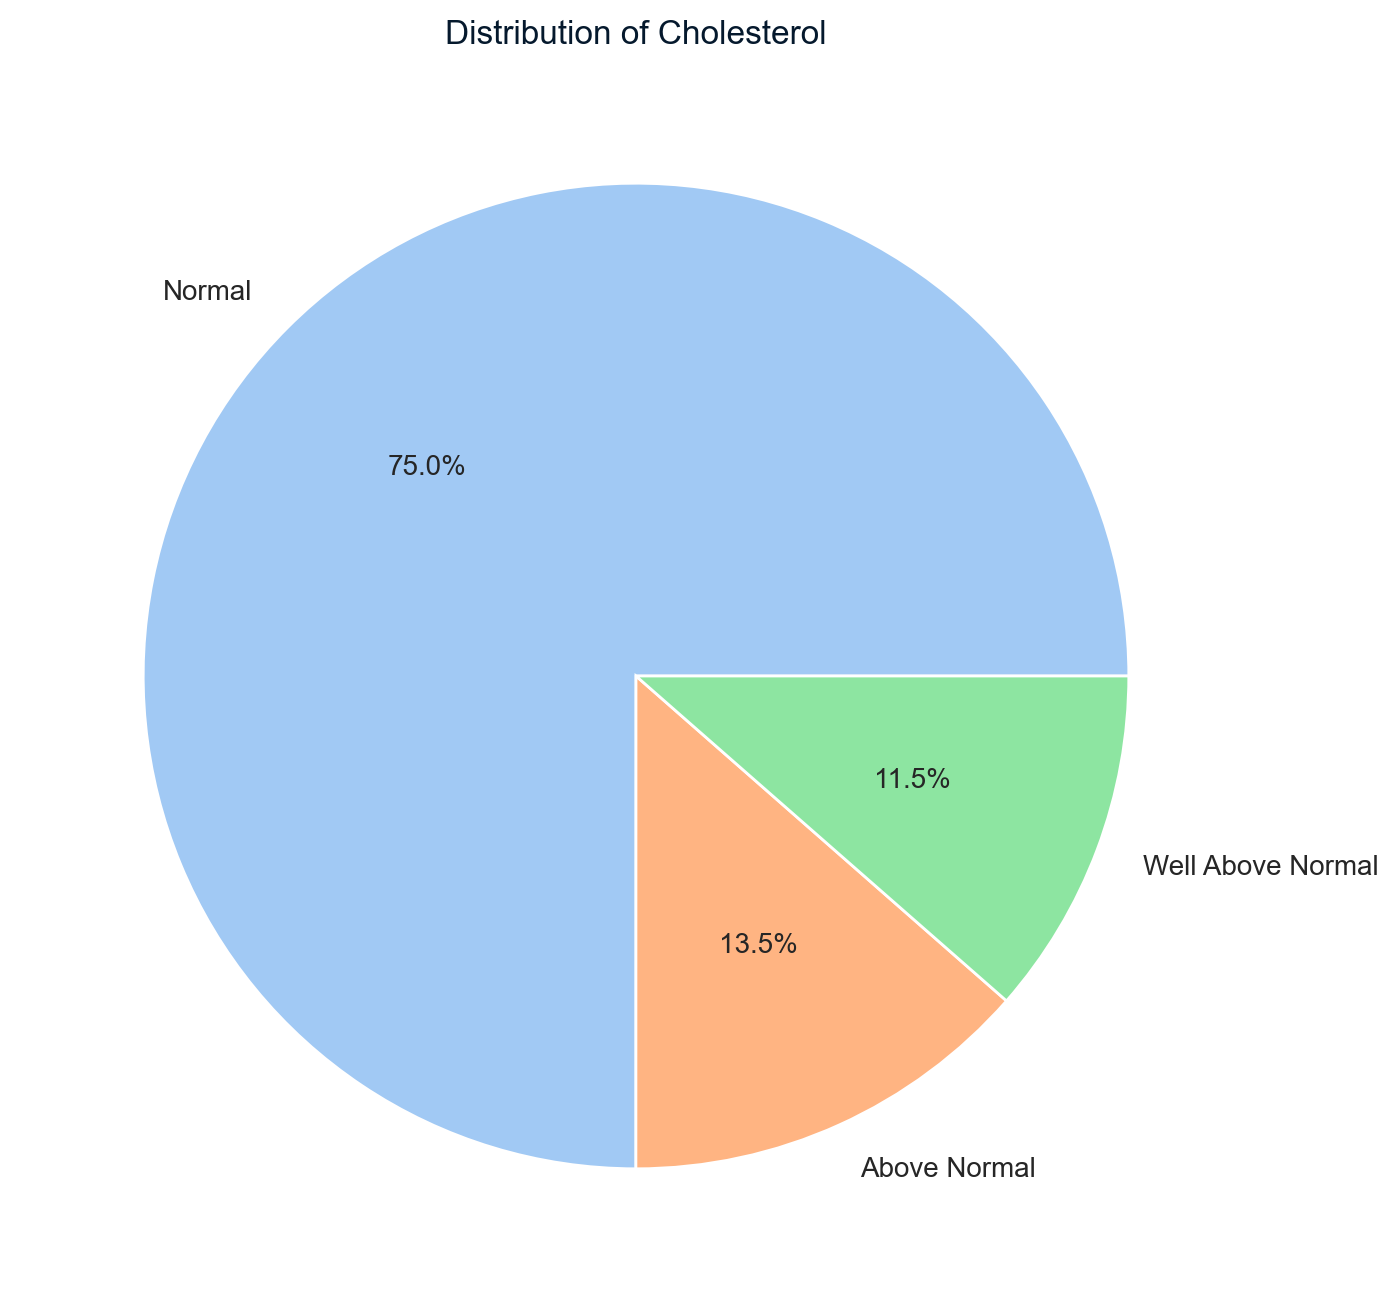

In [24]:
plt.figure(figsize=(8, 8))
df['cholesterol'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Normal', 'Above Normal', 'Well Above Normal'])
plt.title('Distribution of Cholesterol')
plt.ylabel('')
plt.show()


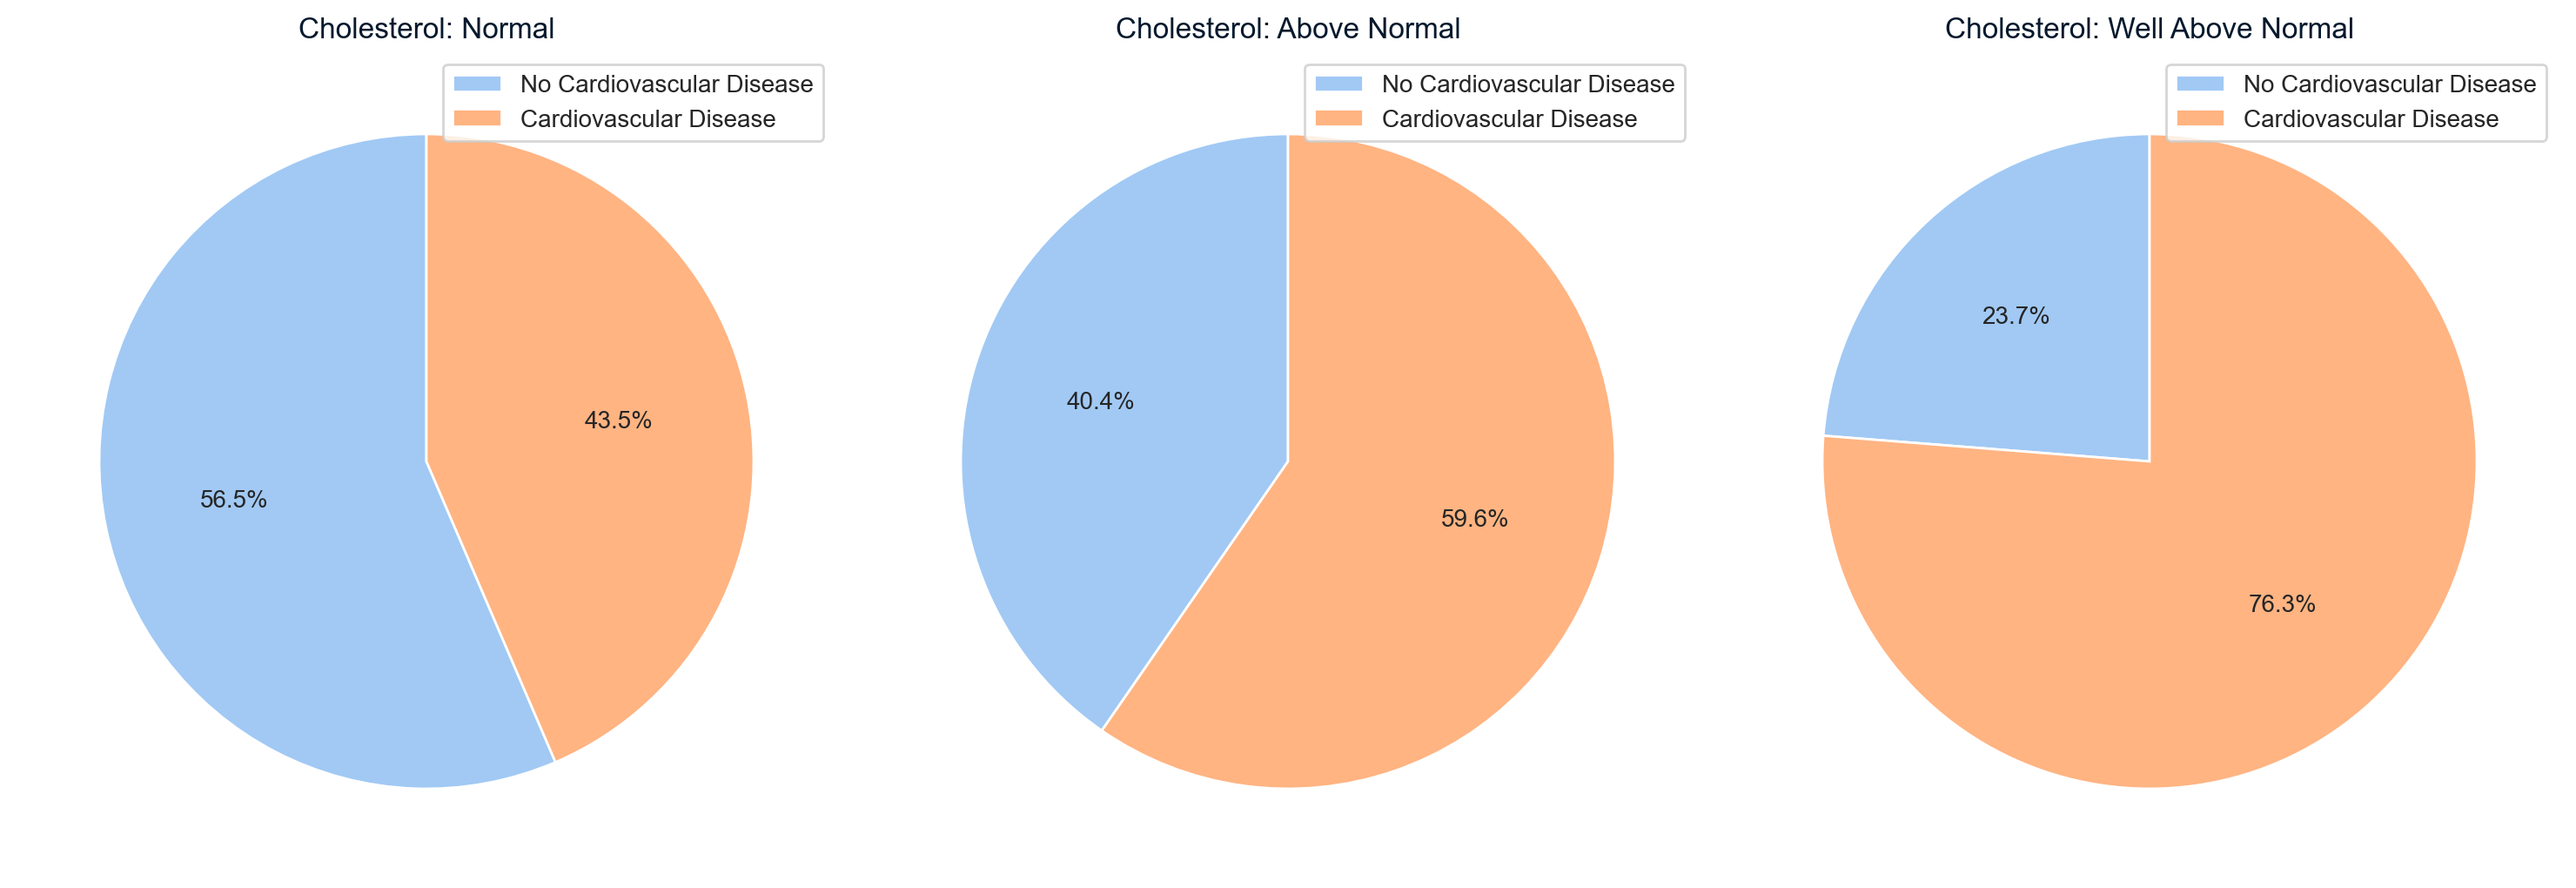

In [20]:
import matplotlib.pyplot as plt

# Mapping of numeric cholesterol categories to actual categories
cholesterol_mapping = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}

# Calculate the proportion of cardiovascular disease for each category of cholesterol
cholesterol_cardio_counts = df.groupby('cholesterol')['cardio'].value_counts(normalize=True).unstack()

# Plot pie charts for each category of cholesterol
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (cholesterol, ax) in enumerate(zip(cholesterol_cardio_counts.index, axes.flatten())):
    cholesterol_category = cholesterol_mapping[cholesterol]
    cholesterol_cardio_counts.loc[cholesterol].plot(kind='pie', autopct='%1.1f%%', ax=ax, startangle=90, labels=None)
    ax.set_ylabel('')
    ax.set_title(f'Cholesterol: {cholesterol_category}')
    ax.legend(labels=['No Cardiovascular Disease', 'Cardiovascular Disease'], loc='upper right')

plt.tight_layout()
plt.show()


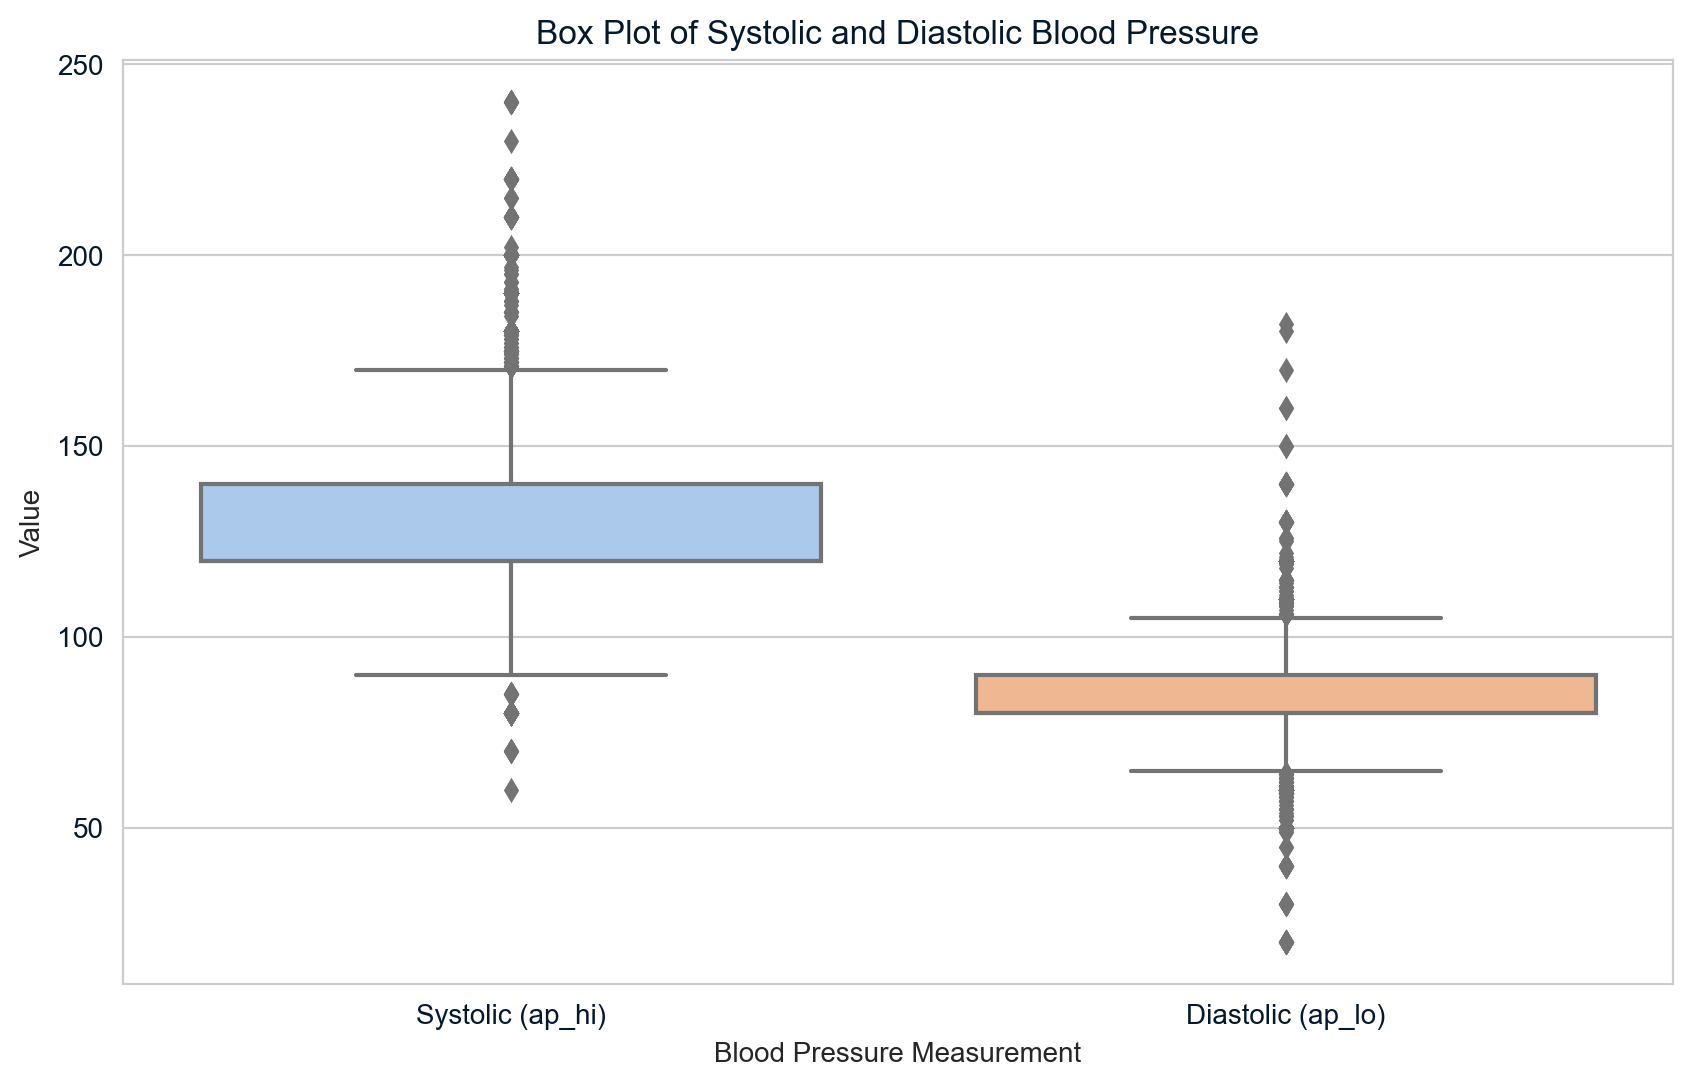

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for both systolic and diastolic blood pressure
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['ap_hi', 'ap_lo']])
plt.xlabel('Blood Pressure Measurement')
plt.ylabel('Value')
plt.title('Box Plot of Systolic and Diastolic Blood Pressure')
plt.xticks(ticks=[0, 1], labels=['Systolic (ap_hi)', 'Diastolic (ap_lo)'])
plt.show()


In [31]:
import pandas as pd
import plotly.express as px

# Clean the data by removing outliers for both systolic and diastolic blood pressure
df_cleaned = df.copy()
df_cleaned = df_cleaned[(df_cleaned['ap_hi'] <= df_cleaned['ap_hi'].quantile(0.975)) & 
                        (df_cleaned['ap_hi'] >= df_cleaned['ap_hi'].quantile(0.025))]
df_cleaned = df_cleaned[(df_cleaned['ap_lo'] <= df_cleaned['ap_lo'].quantile(0.975)) & 
                        (df_cleaned['ap_lo'] >= df_cleaned['ap_lo'].quantile(0.025))]

# Create a DataFrame containing only systolic and diastolic blood pressure measurements and the cardio variable
blood_pressure_cardio = df_cleaned[['ap_hi', 'ap_lo', 'cardio']]

# Melt the DataFrame to long format for plotting
blood_pressure_melted = pd.melt(blood_pressure_cardio, id_vars='cardio', 
                                var_name='Blood Pressure Measurement', 
                                value_name='Value')

# Create an interactive box plot for systolic and diastolic blood pressure against cardio
fig = px.box(blood_pressure_melted, 
             x='Blood Pressure Measurement', 
             y='Value', 
             color='cardio', 
             title='Box Plot of Systolic and Diastolic Blood Pressure against Cardio',
             labels={'cardio': 'Cardio', 'Blood Pressure Measurement': 'Blood Pressure Measurement'})

# Customize the layout
fig.update_layout(
    xaxis_title='Blood Pressure Measurement',
    yaxis_title='Value',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    font=dict(family='Arial', size=12, color='black'),  # Font style and size
    title_font=dict(size=18),  # Title font size
    legend_title='Cardio'
)

# Show the interactive plot
fig.show()


In [30]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Calculate the average risk of cardiac disease by glucose level
glucose_cardio = pd.DataFrame({
    'Glucose Level': sorted(df['gluc'].unique()),
    'Average Risk of Cardiac Disease': df.groupby('gluc')['cardio'].mean(numeric_only=True)
})

# Calculate the distribution of occurrences for each glucose level
glucose_distribution = df['gluc'].value_counts().reset_index()
glucose_distribution.columns = ['Glucose Level', 'Occurrences']

# Create a line plot for average risk of cardiac disease by glucose level
fig = go.Figure()

# Add the line plot
fig.add_trace(
    go.Scatter(
        x=glucose_cardio['Glucose Level'],
        y=glucose_cardio['Average Risk of Cardiac Disease'],
        name='Average Risk of Cardiac Disease',
        line=dict(color='red', width=2),
        mode='lines'
    )
)

# Add a secondary y-axis and plot the histogram for the distribution of occurrences
fig.add_trace(
    go.Bar(
        x=glucose_distribution['Glucose Level'],
        y=glucose_distribution['Occurrences'],
        name='Occurrences',
        marker_color='blue',
        opacity=0.6,
        yaxis='y2'
    )
)

# Update layout for the plot
fig.update_layout(
    title='Average Risk of Cardiac Disease by Glucose Level and Distribution of Occurrences',
    xaxis_title='Glucose Level',
    yaxis_title='Average Risk of Cardiac Disease',
    yaxis2=dict(
        title='Occurrences',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    font=dict(family='Arial', size=12, color='black'),  # Font style and size
    title_font=dict(size=18),  # Title font size
)

# Show the plot
fig.show()


NameError: name 'df' is not defined